Time series

Датасет для роботи:

https://fred.stlouisfed.org/series/T10Y2Y

На вибір - Darts, Prophet

In [49]:
import pandas as pd
from prophet import Prophet

In [50]:
# Завантаження та підготовка даних
data = pd.read_csv("../T10Y2Y.csv")
data["y"] = data['y'].replace('.', 0.0).astype(float)
data.head()

,ds,y
0,1976-06-01,0.68
1,1976-06-02,0.71
2,1976-06-03,0.70
3,1976-06-04,0.77
4,1976-06-07,0.79


In [51]:
m = Prophet()
m.fit(data)

18:32:14 - cmdstanpy - INFO - Chain [1] start processing
18:32:24 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
12940,2025-08-15
12941,2025-08-16
12942,2025-08-17
12943,2025-08-18
12944,2025-08-19


In [53]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12940,2025-08-15,-0.628268,-1.284557,0.011712
12941,2025-08-16,-1.070057,-1.749472,-0.419207
12942,2025-08-17,-1.078631,-1.733144,-0.446166
12943,2025-08-18,-0.718732,-1.361276,-0.047246
12944,2025-08-19,-0.641160,-1.332651,-0.009664


c:\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


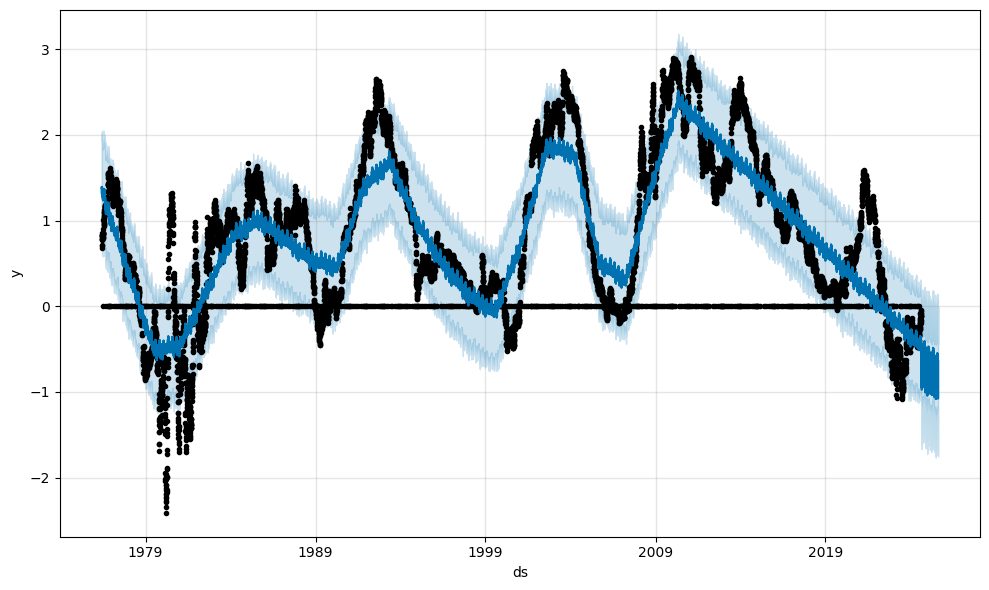

In [54]:
fig1 = m.plot(forecast)

c:\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].d

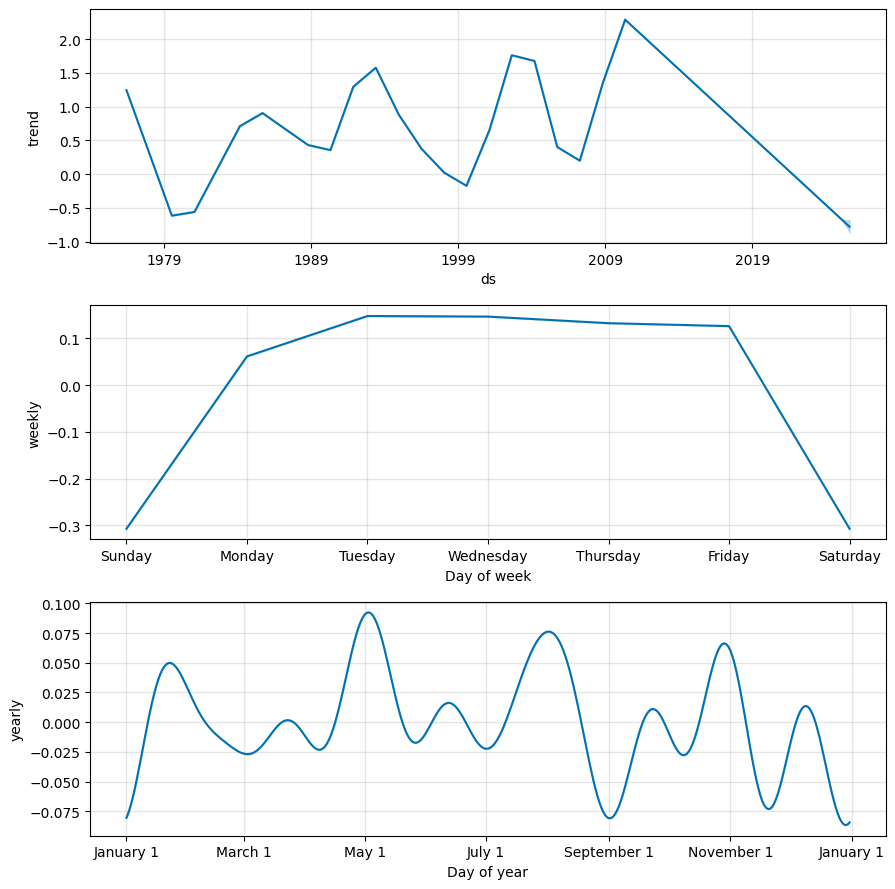

In [55]:
fig2 = m.plot_components(forecast)